<a href="https://colab.research.google.com/github/akhilps45/ICT-Assignments/blob/main/Linear_Algebra_Assignment(Akhil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra Assignment

### Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [ ]:
# Your code here
import pandas as pd
import numpy as np
df = pd.read_csv("auto-mpg.csv")
toyota_corona_mark_ii_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()

dot_products = other_cars.apply(lambda row: np.dot(row, toyota_corona_mark_ii_features), axis=1)
most_similar_cars_indices = dot_products.nlargest(5).index
most_similar_cars = df.loc[most_similar_cars_indices][['car name']]

print("Top 5 similar cars to 'toyota corona mark ii' based on dot product:")
most_similar_cars

Top 5 similar cars to 'toyota corona mark ii' based on dot product:


,car name
44,pontiac safari (sw)
103,chevrolet impala
42,dodge monaco (sw)
95,buick electra 225 custom
90,mercury marquis brougham


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [ ]:
# Your code here
toyota_corona_mark_ii_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()

def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_vec1 = np.linalg.norm(vec1)
  norm_vec2 = np.linalg.norm(vec2)
  if norm_vec1 == 0 or norm_vec2 == 0:
    return 0
  return dot_product / (norm_vec1 * norm_vec2)

similarities = other_cars.apply(lambda row: cosine_similarity(row, toyota_corona_mark_ii_features), axis=1)

least_similar_car_index = similarities.nsmallest(1).index[0]
least_similar_car = df.loc[least_similar_car_index][['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]

print("Car most orthogonal to 'toyota corona mark ii' based on cosine similarity:")
least_similar_car

Car most orthogonal to 'toyota corona mark ii' based on cosine similarity:


,13
car name,buick estate wagon (sw)
mpg,14.0
cylinders,8
displacement,455.0
horsepower,225
weight,3086
acceleration,10.0
model year,70
origin,1


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

Original data shape: (398, 7)
Projected data shape (2D): (398, 2)


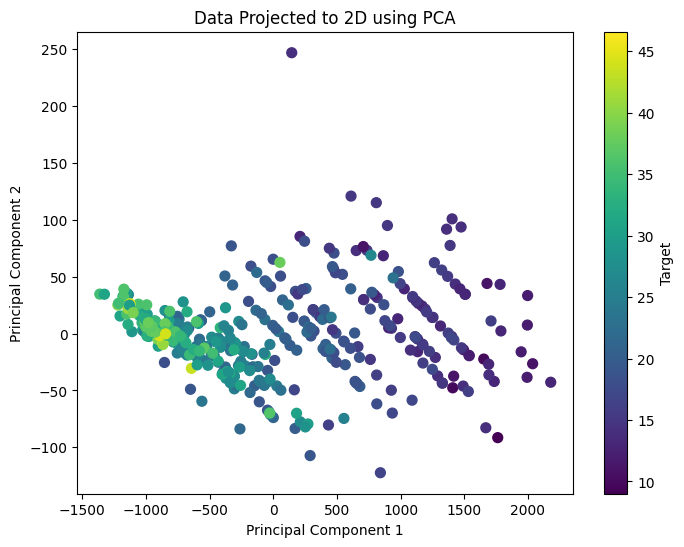

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

X = df.select_dtypes(include=np.number).dropna()

X_2d = pca.fit_transform(X)

print("Original data shape:", X.shape)
print("Projected data shape (2D):", X_2d.shape)

y = df.loc[X.index, 'mpg']

if 'y' in globals():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Target')
    plt.show()
else:
    print("Target variable 'y' not found. Scatter plot will not be colored by target.")
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

### Question 4
Write a function that returns dot product of two list of numbers

In [ ]:
# Your code here
def your_function_21(l1,l2):
    if len(l1) != len(l2):
     raise ValueError("Lists must have the same length for dot product.")
    return sum(x * y for x, y in zip(l1, l2))
list1 = [1, 2, 3]
list2 = [4, 5, 6]
result = your_function_21(list1, list2)
print(f"The dot product of {list1} and {list2} is: {result}")

The dot product of [1, 2, 3] and [4, 5, 6] is: 32


### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [ ]:
# Your code here
def your_function_22(a,b):
  if len(a) != len(b):
    raise ValueError("Vectors must have the same length.")
  b_np = np.array(b)
  if np.linalg.norm(b_np) == 0:
    return [0.0] * len(a)
  dot_prod_ab = np.dot(a, b)
  norm_b_squared = np.dot(b_np, b_np)
  projection = (dot_prod_ab / norm_b_squared) * b_np
  return projection.tolist()
vector_a = [1, 2, 3]
vector_b = [4, 5, 6]
projection_result = your_function_22(vector_a, vector_b)
print(f"The projection of vector {vector_a} onto vector {vector_b} is: {projection_result}")

The projection of vector [1, 2, 3] onto vector [4, 5, 6] is: [1.6623376623376624, 2.077922077922078, 2.4935064935064934]


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [ ]:
# Your code here
class Vector:
  def __init__(self, components):
    if not isinstance(components, (list, tuple)):
      raise TypeError("Vector components must be a list or tuple.")
    if not all(isinstance(c, (int, float)) for c in components):
      raise TypeError("Vector components must be numbers.")
    self.components = list(components)
    self.dimension = len(components)
  def __str__(self):
    return f"Vector({self.components})"
  def __repr__(self):
    return f"Vector({self.components})"
  def __add__(self, other):
    if not isinstance(other, Vector):
      raise TypeError("Can only add Vector objects.")
    if self.dimension != other.dimension:
      raise ValueError("Vectors must have the same dimension for addition.")
    new_components = [x + y for x, y in zip(self.components, other.components)]
    return Vector(new_components)
  def dot_product(self, other):
    if not isinstance(other, Vector):
      raise TypeError("Can only calculate dot product with Vector objects.")
    if self.dimension != other.dimension:
      raise ValueError("Vectors must have the same dimension for dot product.")
    return sum(x * y for x, y in zip(self.components, other.components))
  def magnitude(self):
    return np.linalg.norm(self.components)

vector1 = Vector([1, 2, 3])
vector2 = Vector([4, 5, 6])


vector_sum = vector1 + vector2
print(f"Vector sum: {vector_sum}")


dot_prod_result = vector1.dot_product(vector2)
print(f"Dot product: {dot_prod_result}")


magnitude1 = vector1.magnitude()
magnitude2 = vector2.magnitude()
print(f"Magnitude of vector1: {magnitude1}")
print(f"Magnitude of vector2: {magnitude2}")

Vector sum: Vector([5, 7, 9])
Dot product: 32
Magnitude of vector1: 3.7416573867739413
Magnitude of vector2: 8.774964387392123


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [ ]:
# Your code here
def your_function_28(vector_list):
  vector_np = np.array(vector_list)
  l1_norm = np.linalg.norm(vector_np, ord=1)
  l2_norm = np.linalg.norm(vector_np, ord=2)
  return (l1_norm, l2_norm)

vector_example = [1, 2, 3, 4]
l1, l2 = your_function_28(vector_example)
print(f"The L1 norm of {vector_example} is: {l1}")
print(f"The L2 norm of {vector_example} is: {l2}")

The L1 norm of [1, 2, 3, 4] is: 10.0
The L2 norm of [1, 2, 3, 4] is: 5.477225575051661
